# Test `add_bin_on_overflow`

In [2]:
import polynest
from polynest import utils, visualization
import _polynest as _utils
import matplotlib.pylab as plt
import numpy as np
import json

In [3]:
with open("../tests/data/dress.json") as fp:
    polygons = json.load(fp)
    polygons = utils.wind_clockwise(polygons)
    order_indices = None
    quantity = [3] * 13

In [10]:
model = polynest.NestRectangular(
    add_bin_on_overflow=True,
    group_copies=False,
    num_rotations=2,
    gravity_direction='down',
    dpm=2834.6456664,
    num_procs=8,
    GA_mutation_rate=0.3,
    GA_population_size=32,
    GA_proba_dist_exponent=3,
    GA_patience=20,
    verbose=True
)

model.fit(polygons, (1.6, 2), order_indices, quantity)

Iter: 0   | Patience: 0   | Cost: 7.729 m | Efficiency: 0.599
Iter: 1   | Patience: 1   | Cost: 7.729 m | Efficiency: 0.599
Iter: 2   | Patience: 0   | Cost: 7.527 m | Efficiency: 0.615
Iter: 3   | Patience: 1   | Cost: 7.527 m | Efficiency: 0.615
Iter: 4   | Patience: 0   | Cost: 7.522 m | Efficiency: 0.615
Iter: 5   | Patience: 0   | Cost: 7.490 m | Efficiency: 0.618
Iter: 6   | Patience: 0   | Cost: 7.481 m | Efficiency: 0.619
Iter: 7   | Patience: 0   | Cost: 7.459 m | Efficiency: 0.621
Iter: 8   | Patience: 0   | Cost: 7.425 m | Efficiency: 0.623
Iter: 9   | Patience: 0   | Cost: 7.362 m | Efficiency: 0.629
Iter: 10  | Patience: 0   | Cost: 7.340 m | Efficiency: 0.631
Iter: 11  | Patience: 1   | Cost: 7.340 m | Efficiency: 0.631
Iter: 12  | Patience: 0   | Cost: 7.339 m | Efficiency: 0.631
Iter: 13  | Patience: 0   | Cost: 7.159 m | Efficiency: 0.647
Iter: 14  | Patience: 1   | Cost: 7.159 m | Efficiency: 0.647
Iter: 15  | Patience: 2   | Cost: 7.159 m | Efficiency: 0.647
Iter: 16

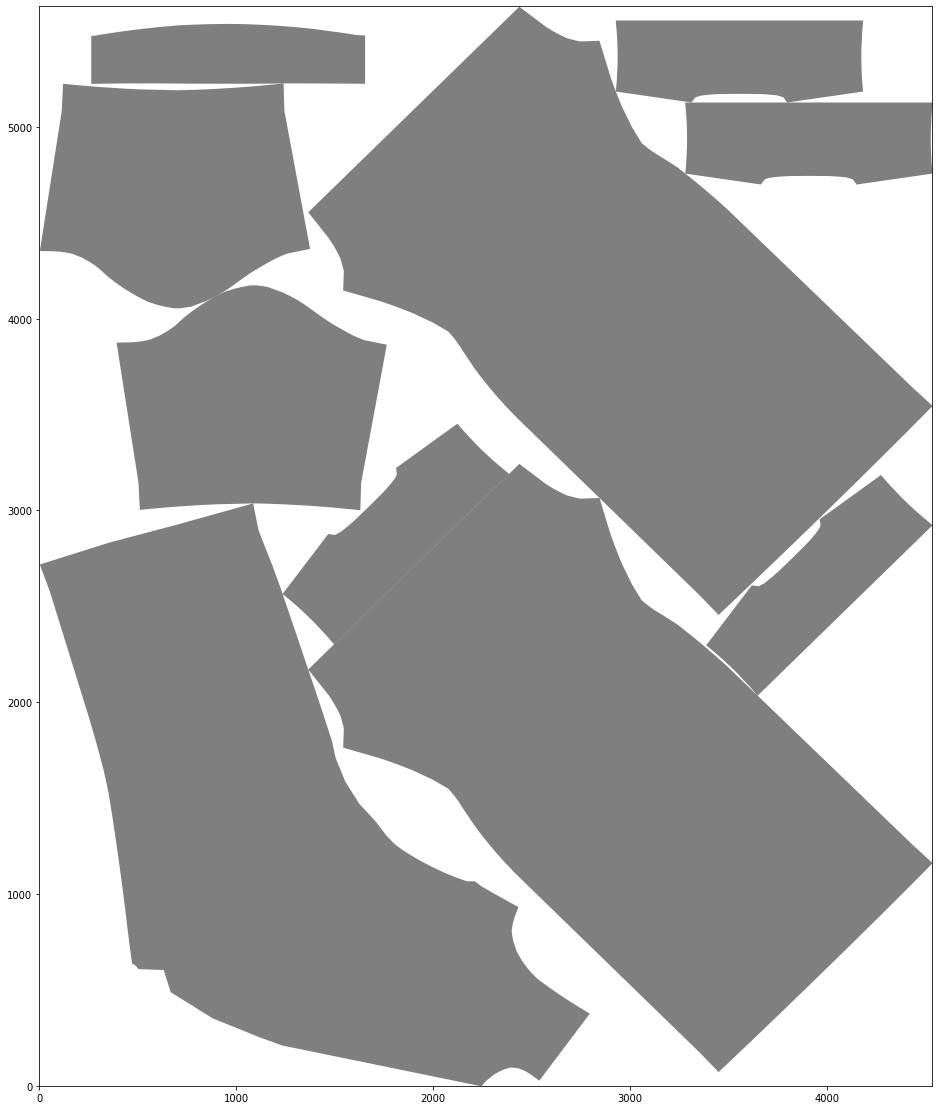

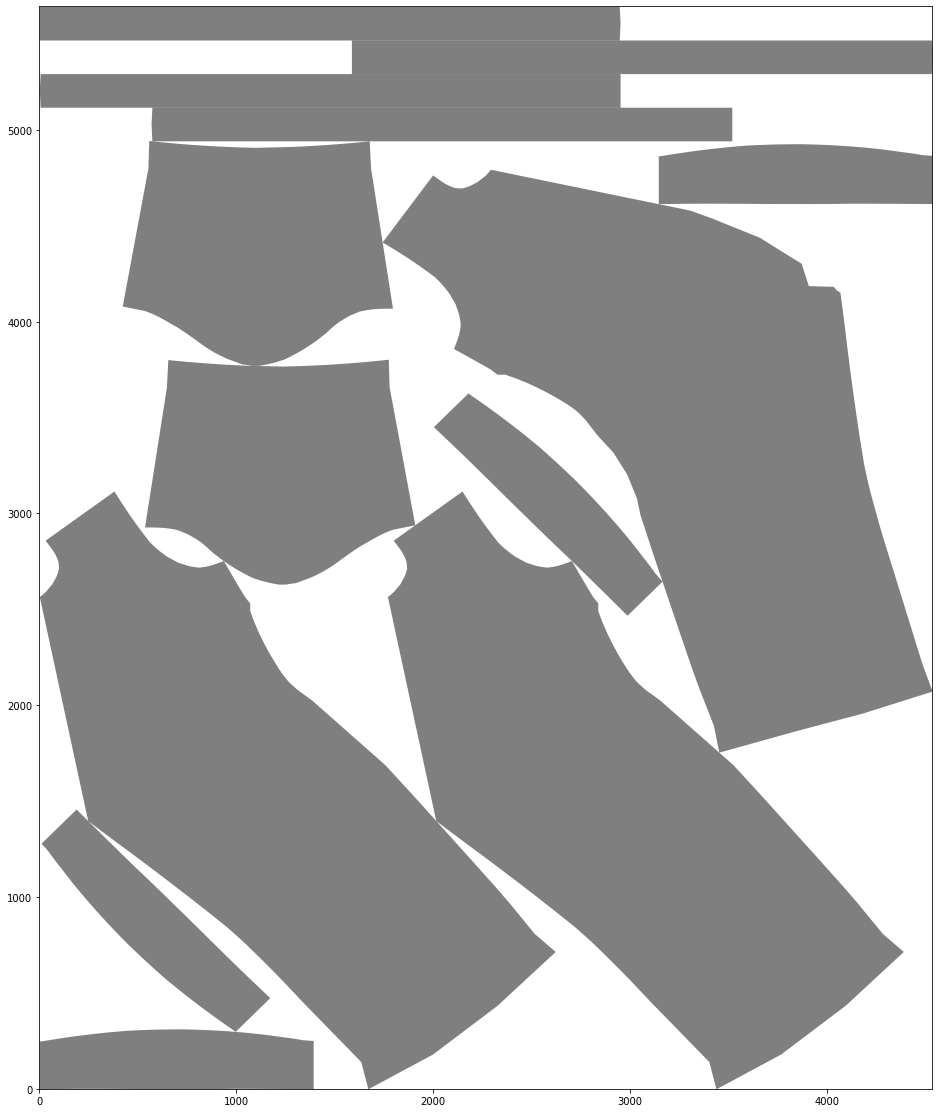

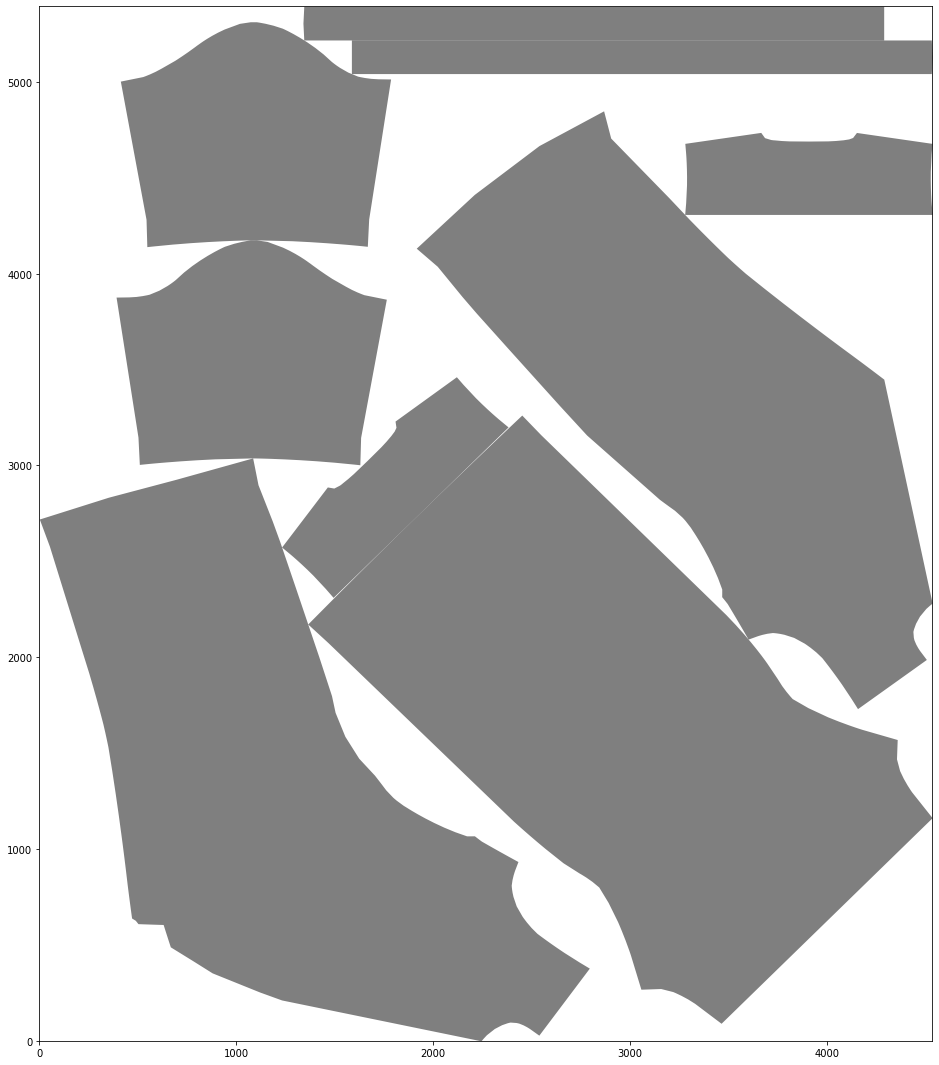

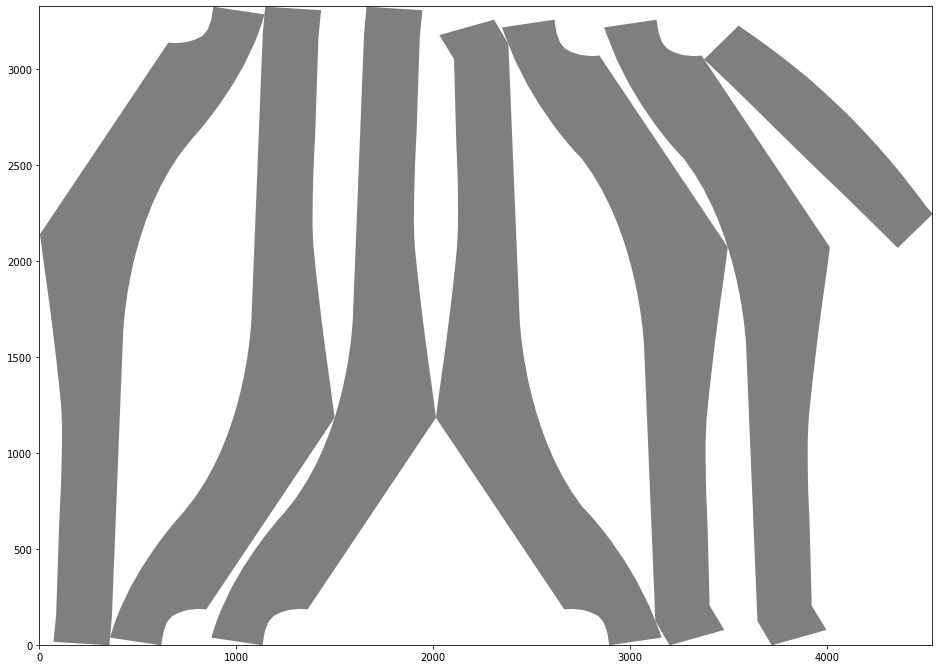

In [11]:
visualization.plot_nesting(model, model.best_translations, frame_width=16, color="black", alpha=0.5, lw=0)

# Test polynest

In [9]:
import polynest
from polynest import utils, visualization
import _polynest as _
import pyclipper
from pyclipper import scale_to_clipper, scale_from_clipper
import numpy as np
import matplotlib.pylab as plt
import json
from collections import defaultdict

In [10]:
# Load polygons (old formatting)
# with open("../tests/data/shirts.json") as fp:
#     polygons = json.load(fp)
# polygons = [[(p['x'], p['y']) for p in polygon] for polygon in polygons]
# polygons = utils.wind_clockwise(polygons)

# Load polygons (new formatting)
with open("../tests/data/5_boy_body_18mo_5_boy_legging_18_mo.json") as fp:
    polygons = json.load(fp)
    polygons = utils.wind_clockwise(polygons)
    order_indices = [0, 0, 0, 0, 1, 1]
    quantity = [5, 5, 5, 5, 5, 5]

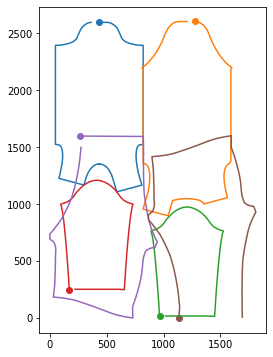

In [11]:
plt.figure(figsize=(6, 6))
plt.gca().set_aspect('equal', adjustable='box')
for p in polygons:
    plt.plot(*zip(*p))
    plt.scatter(*zip(*p[:1]))

### Test `fit`

In [13]:
self = polynest.NestRectangular(num_rotations=2, gravity_direction='down', group_copies=True, num_procs=8, GA_mutation_rate=0.1, GA_population_size=32, GA_patience=20, GA_proba_dist_exponent=10, allow_order_swaps=True, verbose=True, seed=None)
self.fit(polygons, (1.6 * 2834.6456664, 20 * 2834.6456664), order_indices, quantity)

Iter: 0   | Patience: 0   | Cost: 7754.926463748328
Iter: 1   | Patience: 1   | Cost: 7754.926463748328
Iter: 2   | Patience: 2   | Cost: 7754.926463748328
Iter: 3   | Patience: 3   | Cost: 7754.926463748328
Iter: 4   | Patience: 0   | Cost: 7743.694315993693
Iter: 5   | Patience: 1   | Cost: 7743.694315993693
Iter: 6   | Patience: 0   | Cost: 7675.0516795446165
Iter: 7   | Patience: 0   | Cost: 7647.739230193663
Iter: 8   | Patience: 1   | Cost: 7647.739230193663
Iter: 9   | Patience: 2   | Cost: 7647.739230193663
Iter: 10  | Patience: 0   | Cost: 7642.019049292896
Iter: 11  | Patience: 0   | Cost: 7637.780061777681
Iter: 12  | Patience: 1   | Cost: 7637.780061777681
Iter: 13  | Patience: 2   | Cost: 7637.780061777681
Iter: 14  | Patience: 3   | Cost: 7637.780061777681
Iter: 15  | Patience: 0   | Cost: 7637.743706550915
Iter: 16  | Patience: 1   | Cost: 7637.743706550915
Iter: 17  | Patience: 2   | Cost: 7637.743706550915
Iter: 18  | Patience: 3   | Cost: 7637.743706550915
Iter: 19  |

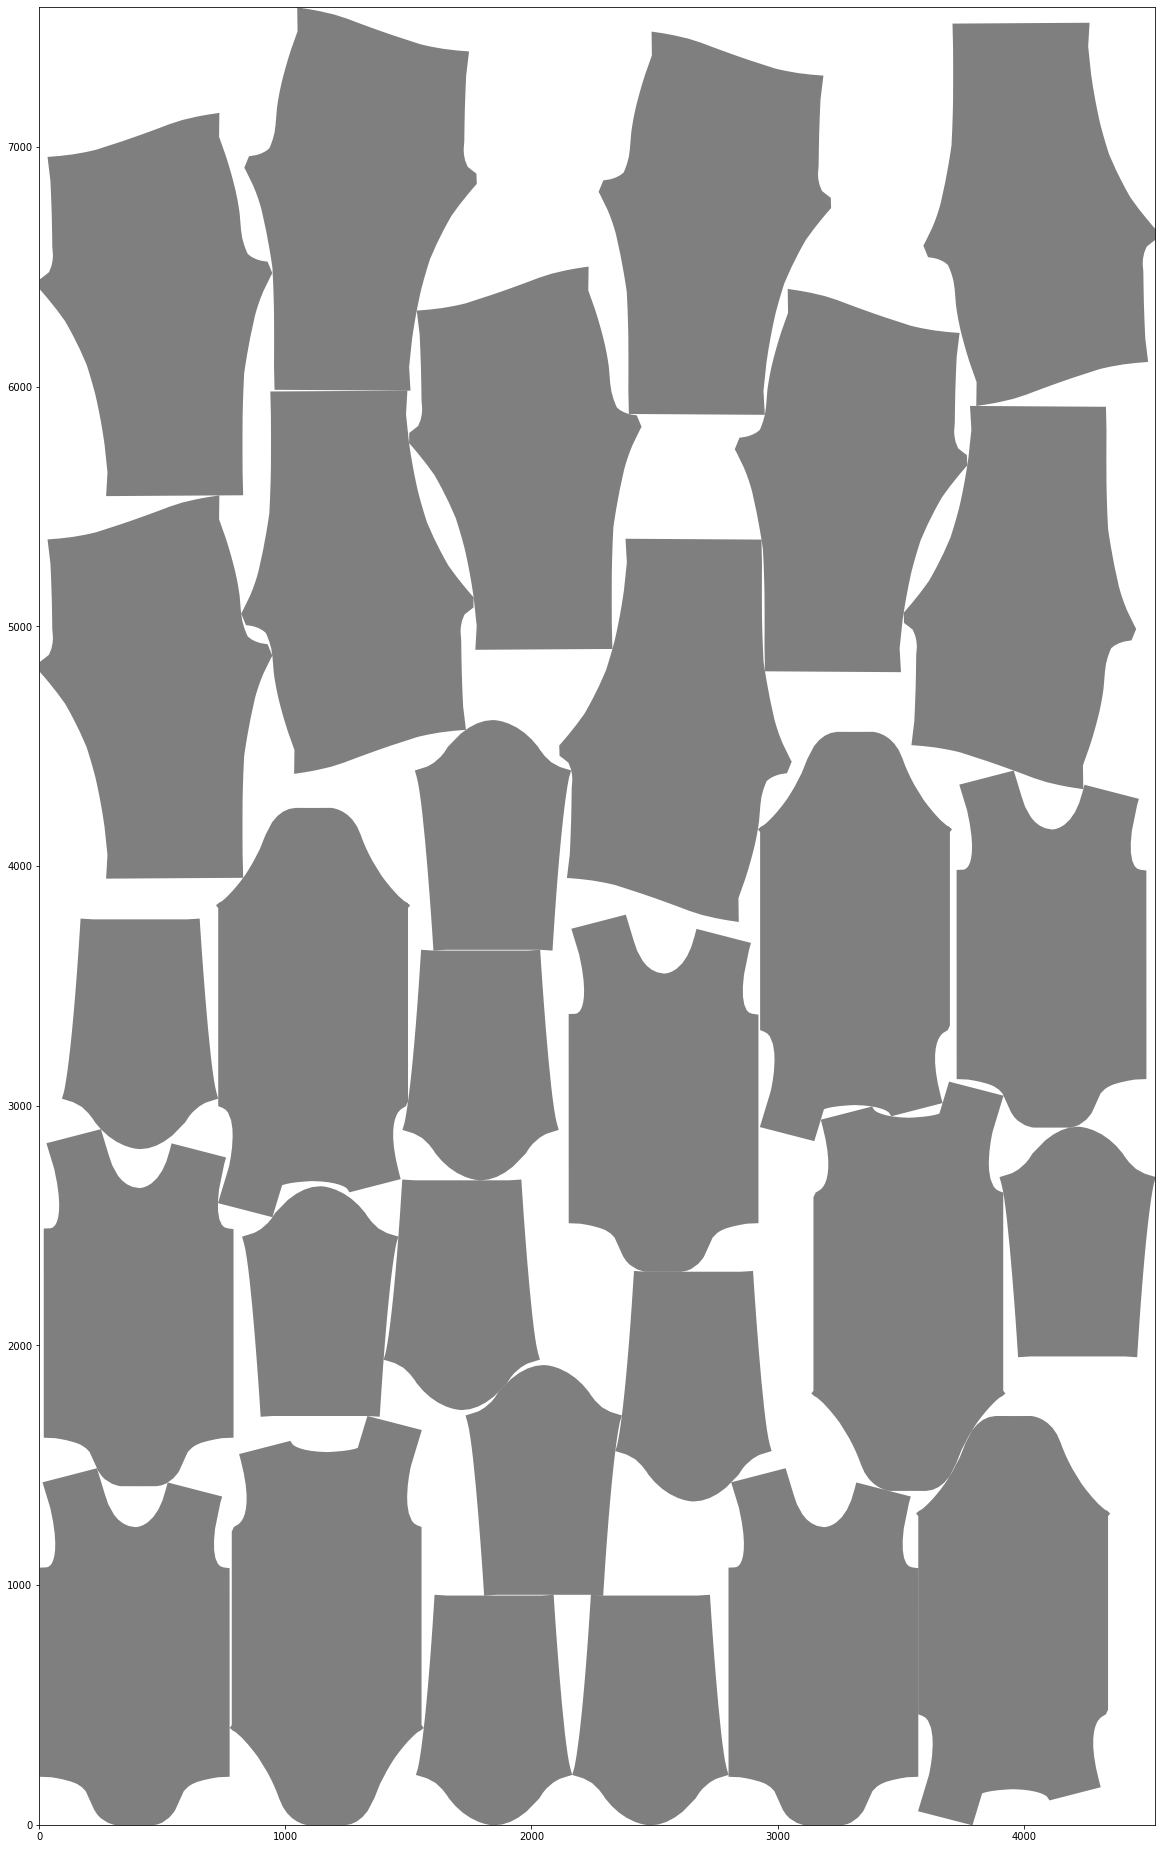

In [14]:
visualization.plot_nesting(self, self.best_translations, frame_width=20, color="black", alpha=0.5, lw=0)
# plt.gca().invert_yaxis()

### Test `offset_polygon`

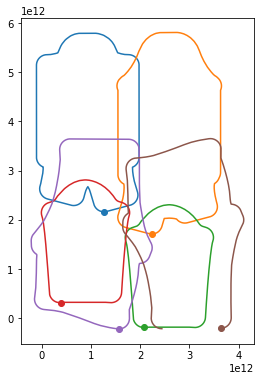

In [22]:
plt.figure(figsize=(6, 6))
plt.gca().set_aspect('equal', adjustable='box')
for p in polygons:
    p = utils.offset_polygon(scale_to_clipper(p), 100, 0.03)
    plt.plot(*zip(*p))
    plt.scatter(*zip(*p[:1]))

# __place_polygons

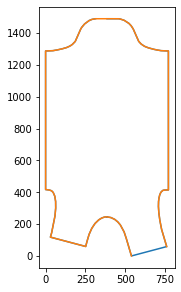

In [6]:
from pyclipper import scale_to_clipper as to_clipper
from pyclipper import scale_from_clipper as from_clipper
import _polynest as _utils


def get_polygon_set(polygons, params):
    """Get list of unique polygons in Clipper coordinates and an index remapping.

    Parameters
    ----------
        polygons : list of lists of lists

    Returns
    -------
        polygon_set : list
        index_map : dict
    """

    def __subtract_min(polygon):
        return np.array(polygon) - np.min(polygon, axis=0)

    def __get_index(polygon_set, polygon_i):
        for iu, polygon_u in enumerate(polygon_set):
            if utils.similar_enough(polygon_u, polygon_i, params['merge_similarity_threshold']):
                return iu
        else:
            return len(polygon_set)

    def __process(polygon):
        polygon = utils.offset_polygon(polygon, params["part_spacing"], params["curve_tolerance"])
        polygon = utils.wind_clockwise([polygon])[0]
        polygon = utils.clean_polygons([polygon], params["curve_tolerance"])[0]
        return polygon

    def __diff(p0, p1):
        return np.array(p1) - np.array(p0)

    # Instantiate output variables
    polygon_set = []
    index_map = {}

    # Loop through polygons
    for i, polygon in enumerate(polygons):

        # Convert to clipper coordinates
        polygon = to_clipper(polygon)

        # Move to coordinate system origin
        polygon0 = __subtract_min(polygon)

        # Find existing polygon that matches
        set_index = __get_index(polygon_set, polygon0)

        # If none were find, add current polygon to `polygon_set`
        if set_index == len(polygon_set):
            polygon_set.append(__process(polygon0))

        set_polygon = polygon_set[set_index]
        
        index_map[i] = dict(
            u=set_index,
            d=from_clipper(__diff(polygon0[0], polygon[0])),
            danchor=from_clipper(__diff(set_polygon[0], polygon0[0]))
        )
        
        plt.figure(figsize=(15, 15 * self.bin[1] / self.bin[0]))
        plt.gca().set_aspect('equal', adjustable='box')
        a = np.array(from_clipper(polygon)) - index_map[i]['d0']
        b = from_clipper(set_polygon)
        plt.plot(*zip(*a))
        plt.plot(*zip(*b))
        break
    
    return polygon_set, index_map

tmp = get_polygon_set(polygons, self.params)

In [5]:
self = polynest.NestRectangular(num_rotations=2, gravity_direction='left', num_procs=8, GA_mutation_rate=0.1, GA_population_size=10, GA_patience=20, GA_proba_dist_exponent=10, allow_order_swaps=True, verbose=True, seed=None)
bin_ = (5 * 2834.6456664, 1.6 * 2834.6456664)
self.init_conditions(polygons, bin_, order_indices, quantity)

order = self.population[0]['order']
rotation = self.population[0]['rotation']

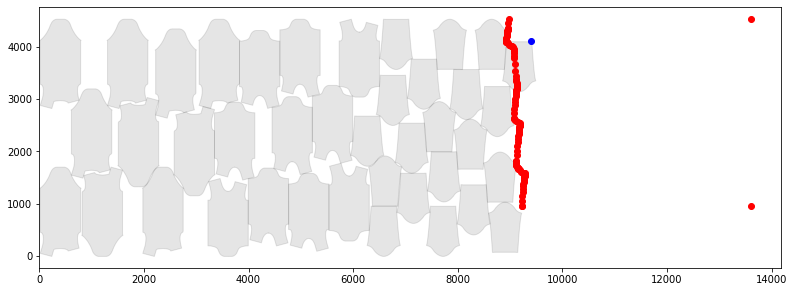

In [20]:
translations = []
cost = 0

for ind, part in enumerate(order):
    iu = self.index_map[part[0]]["u"]
    r = rotation[ind]
    key_iur = (iu, r)
    bin_nfp = self.nfp_cache[((-1, 0), key_iur)]

    # In first iteration, the bin nfp has all the valid positions
    if len(translations) == 0:
        valid_positions = bin_nfp

    # In later iterations: (1) combine nfps of placed parts with current part,
    # and (2) subtract it from bin nfp to get valid positions for the part.
    else:
        nfps = [
            self.nfp_cache[(t["key"], key_iur)] + t["d_clipper"]
            for t in translations
        ]
        union_nfp = utils.polygon_union(nfps)
        valid_positions = utils.polygon_set_difference(union_nfp, [bin_nfp])
        valid_positions = np.array(utils.flatten(valid_positions))

    # Get best position
    best_position = utils.plane_min(valid_positions, self.params["gravity_direction"])
    
    # Convert to displacements
    d = list(
        np.array(scale_from_clipper(best_position))
        - _.rotate_point(np.array(self.polygons[part[0]][0]) - self.index_map[part[0]]["d_anchor"], r)
    )
    d_clipper = best_position - self.polygon_cache[key_iur][0]

    translations.append(
        dict(
            d=d,
            d_clipper=list(d_clipper),  ## DEBUG: D_CLIPPER COORDINATE SOMEHOW DOES NOT MATCH D COORDINATE.Q
            i=part[0],
            iu=iu,
            key=key_iur,
            r=r,
        )
    )

    # Evaluate cost
    length = utils.plane_length(
        np.array(scale_from_clipper(self.polygon_cache[key_iur] + d_clipper)),
        self.params["gravity_direction"],
        self.bin,
    )

    if length > cost:
        cost = length
        
    if ind == 40:
        break

plt.figure(figsize=(15, 15 * self.bin[1] / self.bin[0]))
plt.gca().set_aspect('equal', adjustable='box')
#plt.gca().invert_yaxis()

for ind_, t in enumerate(translations):
    poly = np.array(
        _.rotate_polygon(self.polygons[t['i']], t['r'], False)
    ) + t['d']
    
    visualization.plot_polygon(poly, color='black', alpha=0.1, lw=1)
    
    if ind_ == ind:
        plt.scatter(*zip(*poly[:1]), zorder=2, color="blue")

plt.scatter(*zip(*scale_from_clipper(valid_positions)), color="red")
#plt.ylim(bin_[1], 0)
plt.xlim(0, bin_[0])
plt.show()

In [11]:
translations

[]

In [6]:
translations

[{'d': [-1048.1300000002607, -2604.23],
  'd_clipper': [0.0, 0.0],
  'i': 1,
  'iu': 1,
  'key': (1, 0.0),
  'r': 0.0}]

### Sanity check `utils.minkowski_diff`

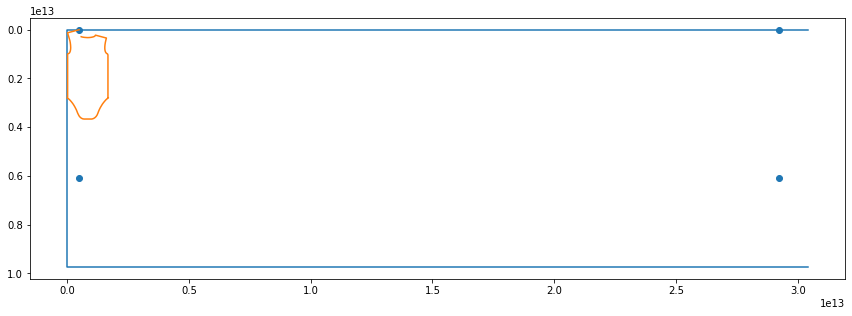

In [26]:
keya = (-1, 0)
keyb = (1, 0)
polya = self.polygon_cache[keya] # the bin
polyb = self.polygon_cache[keyb] # first polygon

nfp = utils.minkowski_diff(((keya, keyb), (polya, polyb)))[1]

plt.figure(figsize=(15, 15 * self.bin[1] / self.bin[0]))
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().invert_yaxis()

plt.plot(*zip(*polya))
plt.plot(*zip(*polyb))
plt.scatter(*zip(*nfp))

### Sanity check `get_polygon_set`.

NameError: name 'self' is not defined

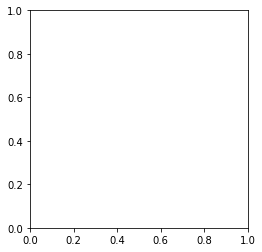

In [4]:
plt.figure()
plt.gca().set_aspect('equal', adjustable='box')
for p in self.polygon_set:
    plt.plot(*zip(*p))
    plt.scatter(*zip(*p[:1]))

### Sanity check `__fill_polygon_cache`

### Test functions

In [83]:
def __new_generation(self, cost_scores):
    """Create population of mutated children of stochastically
    drawn best specimen.

    Parameters
    ----------
        cost_scores : list

    Returns
    -------
        population : lists of dicts
    """
    # Sort `self.population` and `cost_scores` wrt `cost_scores`
    population, cost_scores = utils.sort_lists_wrt_one(
        [self.population, cost_scores], 1
    )

    # Start new population with best specimen
    new_population = [population[0]]
    while len(new_population) < self.GA_population_size:

        # Select random pair for breeding, proportional to their cost
        male, female = utils.get_random_pair(
            population, cost_scores, utils.to_inv_probadist
        )

        # Breed male and female
        children = self.__cross_breed([male, female])

        # Add mutated children to new population
        new_population.append(self.__mutate(children[0]))
        if len(new_population) < self.GA_population_size:
            new_population.append(self.__mutate(children[1]))

    return new_population

In [86]:
cls = polynest.NestRectangular(num_rotations=2, seed=5, allow_order_swaps=True)
func = cls._Nest__mutate

# Init
cls.order_indices = [0, 0, 0, 1, 1, 1]

# Params and returns
params = dict(
    specimen={
        'order': [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0)],
        'rotation': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    }
)

__mutate(cls, **params)

0.22199317108973948
0.8928601514360016
0.07630828937395717
0.8734294027918162
0.010374153885699955
{0: 1, 1: 0}


{'order': [(3, 0), (5, 0), (4, 0), (0, 0), (1, 0), (2, 0)],
 'rotation': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}